In [1]:
import xgboost as xgb
print(xgb.__version__)

2.1.3


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from xgboost import XGBClassifier
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
#import shap
#shap.initjs()



In [3]:

# Load the dataset
data = pd.read_csv("Data.csv")

In [4]:
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [5]:
# Data preprocessing: Handle categorical columns
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

In [6]:
# Define features (X) and target variable (y)
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']

In [7]:
data['Recommendation'].value_counts()

Recommendation
0    274
1    205
Name: count, dtype: int64

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(  learning_rate=0.1,  # Step size shrinkage used in updates to prevent overfitting
    max_depth=3,  # Maximum depth of a tree
    n_estimators=100,  # Number of trees in the ensemble
    subsample=0.8,  # Fraction of samples used for fitting the base learners
    colsample_bytree=0.8,  # Fraction of features used for each tree
    gamma=0,  # Minimum loss reduction required to make a further partition
    reg_alpha=0,  # L1 regularization term on weights
    reg_lambda=1,  # L2 regularization term on weights
    objective='binary:logistic',  # Objective function for binary classification
    min_child_weight=1,  # Minimum sum of instance weight(s) needed in a child
    max_delta_step=0,  # Maximum delta step allowed for each tree's weight estimation
    scale_pos_weight=1,  # Controls the balance of positive and negative weights
    seed=42  # Random number seed
    )
xgb_clf.fit(X_train, y_train,eval_set=[(X_test, y_test)])
# Make predictions
y_pred = xgb_clf.predict(X_test)


[0]	validation_0-logloss:0.68509
[1]	validation_0-logloss:0.68760
[2]	validation_0-logloss:0.68494
[3]	validation_0-logloss:0.68338
[4]	validation_0-logloss:0.68327
[5]	validation_0-logloss:0.67935
[6]	validation_0-logloss:0.68074
[7]	validation_0-logloss:0.68014
[8]	validation_0-logloss:0.67857
[9]	validation_0-logloss:0.67722
[10]	validation_0-logloss:0.67566
[11]	validation_0-logloss:0.67860
[12]	validation_0-logloss:0.67657
[13]	validation_0-logloss:0.67633
[14]	validation_0-logloss:0.67764
[15]	validation_0-logloss:0.67536
[16]	validation_0-logloss:0.67930
[17]	validation_0-logloss:0.67886
[18]	validation_0-logloss:0.67909
[19]	validation_0-logloss:0.68080
[20]	validation_0-logloss:0.68221
[21]	validation_0-logloss:0.68000
[22]	validation_0-logloss:0.67914
[23]	validation_0-logloss:0.67860
[24]	validation_0-logloss:0.67657
[25]	validation_0-logloss:0.67609
[26]	validation_0-logloss:0.67252
[27]	validation_0-logloss:0.67516
[28]	validation_0-logloss:0.67470
[29]	validation_0-loglos

In [10]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"AccuracyAAAAA: {accuracy_score(y_test, y_pred):.2f}")  # Calculate accuracy
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6145833333333334
AccuracyAAAAA: 0.61

Confusion Matrix:
 [[41 12]
 [25 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69        53
           1       0.60      0.42      0.49        43

    accuracy                           0.61        96
   macro avg       0.61      0.60      0.59        96
weighted avg       0.61      0.61      0.60        96



In [11]:
# Save the trained model
xgb_model_filename = 'xgboost_model.pkl'
joblib.dump(xgb_clf, xgb_model_filename)
print(f"XGBoost model saved to {xgb_model_filename}")

XGBoost model saved to xgboost_model.pkl


In [12]:
# Save the label encoders
encoder_filename = 'label_encoders.pkl'
joblib.dump(label_encoders, encoder_filename)
print(f"Label Encoders saved to {encoder_filename}")

Label Encoders saved to label_encoders.pkl


In [13]:
# Function to preprocess new input data
def preprocess_input(data, label_encoders):
    """
    Preprocess input data by encoding categorical columns using saved label encoders.

    Args:
        data (pd.DataFrame): Input data for prediction.
        label_encoders (dict): Dictionary of saved label encoders.

    Returns:
        pd.DataFrame: Encoded input data.
    """
    for column in data.columns:
        if column in label_encoders:
            le = label_encoders[column]
            data[column] = le.transform(data[column].astype(str))
    return data

In [14]:
# Example input data
new_data = pd.DataFrame({
    'Style': ['Casual'],
    'Price': ['Low'],
    'Rating': [4.5],
    'Size': ['M'],
    'Season': ['Summer'],
    'NeckLine': ['round-neck'],
    'SleeveLength': ['short'],
    'Material': ['cotton'],
    'FabricType': ['chiffon'],
    'Pattern Type': ['solid']
})

In [15]:

# Create the XGBoost classifier instance with default parameters
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

# Train the model
start_time = time.time()
xgb_clf.fit(X_train, y_train)
end_time = time.time()

# Calculate and print the execution time for training
execution_time = end_time - start_time
print(f"Model training execution time: {execution_time:.2f} seconds")

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model training execution time: 0.22 seconds
Model accuracy: 57.29%


Confusion matrix:
 [[32 21]
 [20 23]]


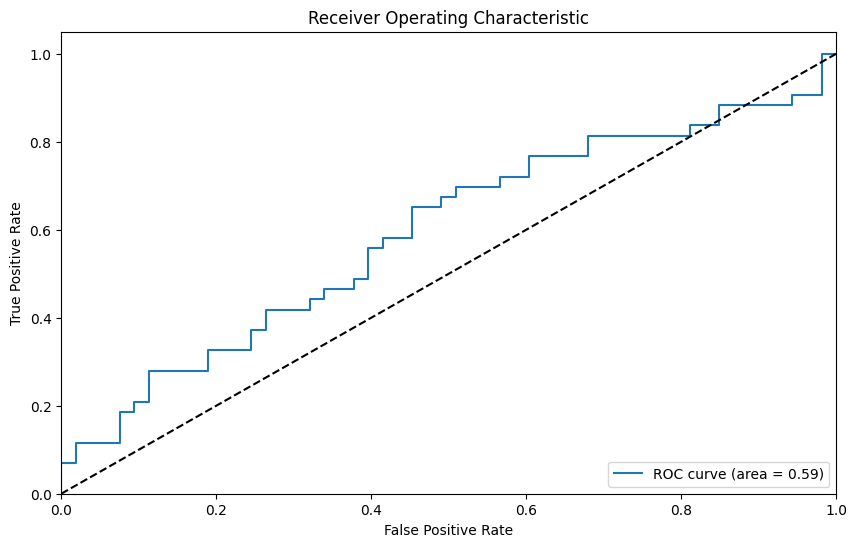

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61        53
           1       0.52      0.53      0.53        43

    accuracy                           0.57        96
   macro avg       0.57      0.57      0.57        96
weighted avg       0.57      0.57      0.57        96



<Figure size 1000x800 with 0 Axes>

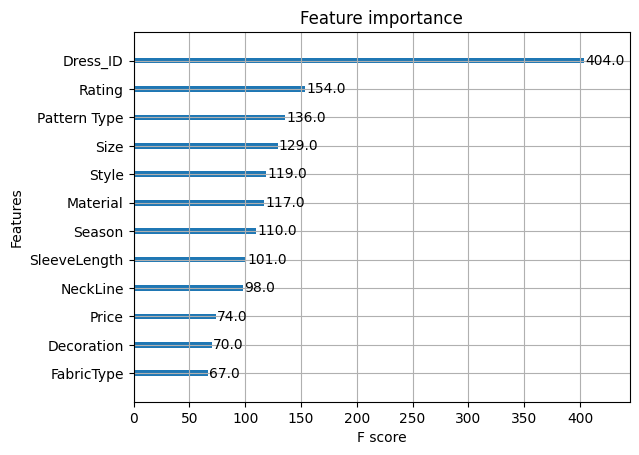

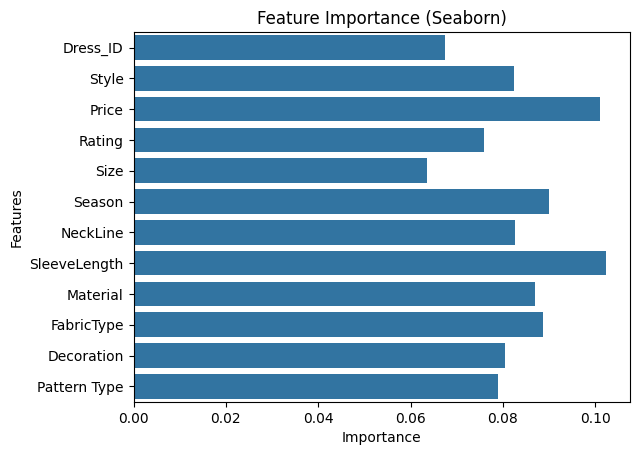

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("Classification report:\n", classification_report(y_test, y_pred))

# Feature importance plot using XGBoost's built-in function
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_clf)
plt.show()

# Horizontal bar plot of feature importances using Seaborn
sns.barplot(x=xgb_clf.feature_importances_, y=X_train.columns, orient='h')
plt.title('Feature Importance (Seaborn)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [20]:
def preprocess_input(data, label_encoders):
    for column in data.columns:
        if column in label_encoders:
            le = label_encoders[column]
            try:
                # Replace None with 'nan' or 'none' if necessary
                if data[column].isnull().any():
                    data[column] = data[column].fillna('nan')  # or 'none', depending on your choice
                data[column] = le.transform(data[column])
            except ValueError:
                st.error(f"Invalid value in '{column}'. Allowed values: {list(le.classes_)}")
                return None
    
    # Convert categorical columns to 'category' dtype
    categorical_columns = ['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'Material', 'FabricType', 'Pattern Type']
    for column in categorical_columns:
        if column in data.columns:
            data[column] = data[column].astype('category')
    
    return data
